# EXPLORACIÓN DEL DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir("C:/Users/vyago/Desktop/Yago/Competencia/ypf")  # Directorio actual
train = pd.read_csv("../Dataset/dataset_train.csv")
train["evento"] = train["delta_WHP"].apply( lambda x: 1 if x!=0 else 0)  # Genero feature evento de interferencia


### Valores nulos

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26178 entries, 0 to 26177
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID_FILA      26178 non-null  int64  
 1   ID_EVENTO    26178 non-null  object 
 2   CAMPO        26178 non-null  object 
 3   FLUIDO       26178 non-null  object 
 4   PAD_HIJO     26178 non-null  object 
 5   HIJO         26178 non-null  object 
 6   ETAPA_HIJO   26178 non-null  int64  
 7   PADRE        26178 non-null  object 
 8   D3D          26178 non-null  float64
 9   D2D          26178 non-null  float64
 10  DZ           26178 non-null  float64
 11  AZ           26178 non-null  float64
 12  #_BARRERAS   26178 non-null  float64
 13  LINEAMIENTO  26178 non-null  object 
 14  WHP_i        26178 non-null  float64
 15  delta_WHP    26178 non-null  float64
 16  ESTADO       26178 non-null  object 
 17  evento       26178 non-null  int64  
dtypes: float64(7), int64(3), object(8)
memory usag

In [4]:
train.isna().sum() # Ver nulos por columna

ID_FILA        0
ID_EVENTO      0
CAMPO          0
FLUIDO         0
PAD_HIJO       0
HIJO           0
ETAPA_HIJO     0
PADRE          0
D3D            0
D2D            0
DZ             0
AZ             0
#_BARRERAS     0
LINEAMIENTO    0
WHP_i          0
delta_WHP      0
ESTADO         0
evento         0
dtype: int64

### Estadística descriptiva

In [4]:
train.describe()

,ID_FILA,ETAPA_HIJO,D3D,D2D,DZ,AZ,#_BARRERAS,WHP_i,delta_WHP,evento
count,26178.00000,26178.00000,2.617800e+04,2.617800e+04,26178.000000,26178.000000,26178.000000,26178.000000,26178.000000,26178.000000
mean,13089.50000,17.15960,1.895747e+03,1.581289e+03,16.018874,198.880267,0.904194,139.688731,1.375667,0.119375
std,7557.08201,11.22884,3.473443e+04,2.784022e+04,30.351291,1377.390169,1.226151,128.197956,7.573975,0.324236
min,1.00000,1.00000,7.062635e+01,2.021954e+01,-59.984196,0.029378,0.000000,-0.400000,-90.000000,0.000000
25%,6545.25000,8.00000,7.125195e+02,7.118214e+02,-4.570704,90.467178,0.000000,41.100000,0.000000,0.000000
50%,13089.50000,16.00000,1.040079e+03,1.039356e+03,13.179981,201.270318,0.000000,84.200000,0.000000,0.000000
75%,19633.75000,24.00000,1.312413e+03,1.311902e+03,38.114759,271.383555,1.000000,236.300000,0.000000,0.000000
max,26178.00000,68.00000,1.596803e+06,1.509322e+06,196.058428,177932.000000,9.000000,551.800000,212.800000,1.000000


### Correlación entre variables

Text(0.5, 1.0, 'Porcentaje de correlación entre variables')

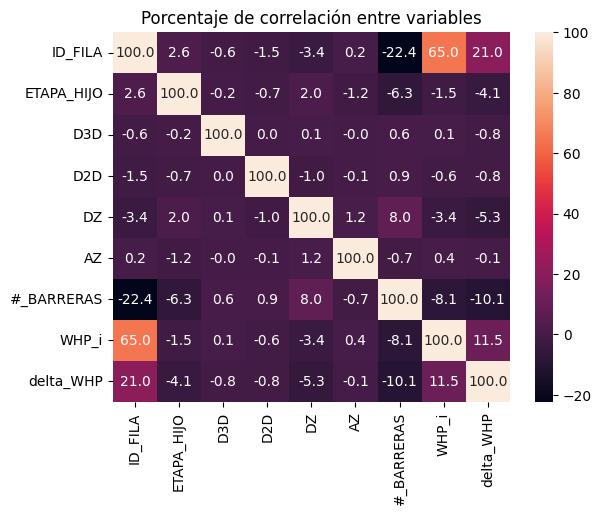

In [6]:
correlacion=train.corr()
correlacion = correlacion*100 # Escalo para sacar %


ax=sns.heatmap(correlacion,fmt=".1f",annot=True)
ax.set_title("Porcentaje de correlación entre variables")

### Distribución de las presiones de operación

Presión de operación

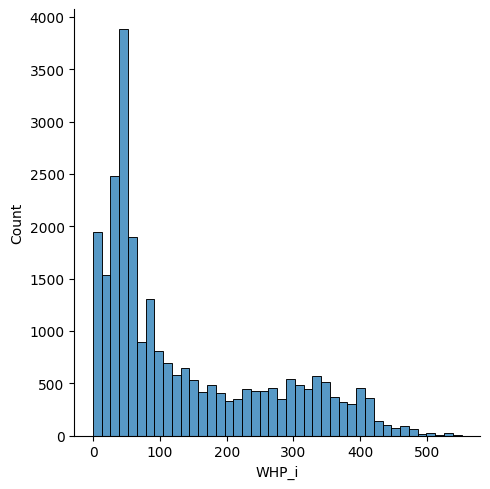

In [7]:
sns.displot(
    data=train,
    x="WHP_i",
)

Deltas de presión, exluyendo los valores que son cero

In [8]:
train["log_delta"]=train["delta_WHP"].apply(lambda x : np.log(x) if x!=0 else 0)
train["log_raiz"]=train["delta_WHP"].apply(lambda x : np.sqrt(x) if x!=0 else 0)


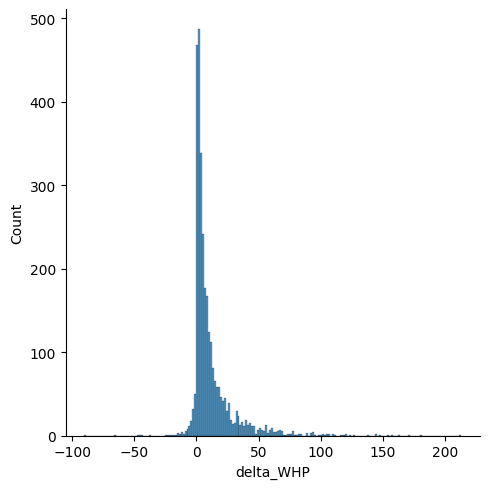

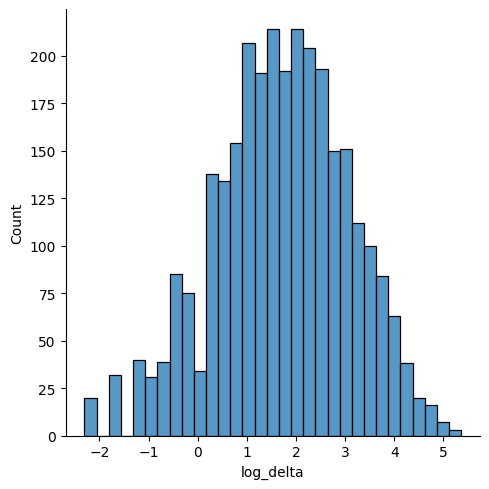

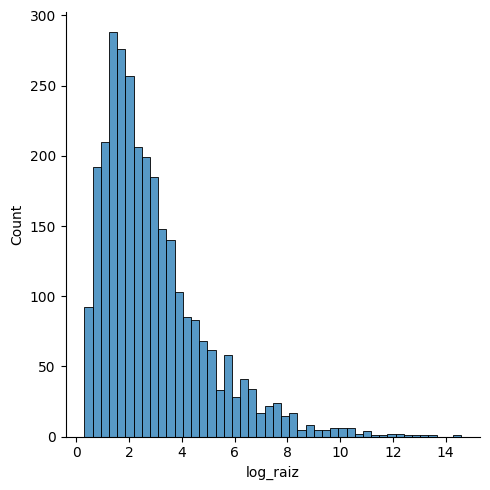

In [9]:


sns.displot(
    data=train[train["log_delta"]!=0],
    x="delta_WHP"
)

sns.displot(
    data=train[train["log_delta"]!=0],
    x="log_delta"
)

sns.displot(
    data=train[train["log_delta"]!=0],
    x="log_raiz"
)

### Medida de la interfencia

[Text(0, 0, 'Campo D'),
 Text(1, 0, 'Campo F'),
 Text(2, 0, 'Campo E'),
 Text(3, 0, 'Campo B'),
 Text(4, 0, 'Campo I'),
 Text(5, 0, 'Campo C'),
 Text(6, 0, 'Campo A'),
 Text(7, 0, 'Campo G')]

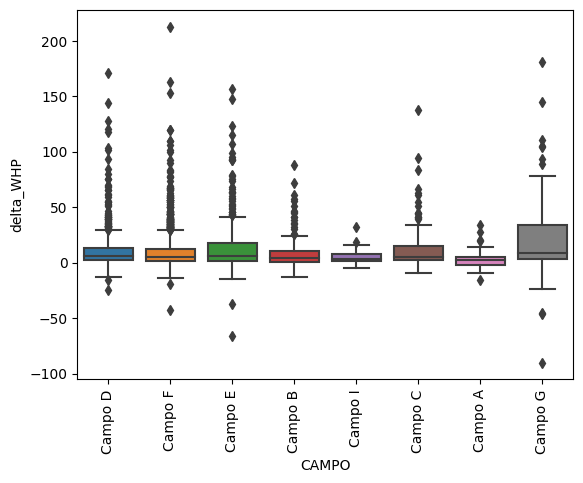

In [34]:
train_0 = train[train["delta_WHP"]!=0] #PARA VISUALIZAR UN BOXPLOT TENGO QUE SACAR VALORES NULOS YA QUE SI NO SE CENTRA ALLÍ
ax = sns.boxplot(data=train_0,y="delta_WHP",x="CAMPO")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

EL CAMPO G TIENE UNA MEDIANA DE INTERFERENCIAS MAYORES QUE EL RESTO

### Eventos de interferencia 

<AxesSubplot:xlabel='FLUIDO', ylabel='evento'>

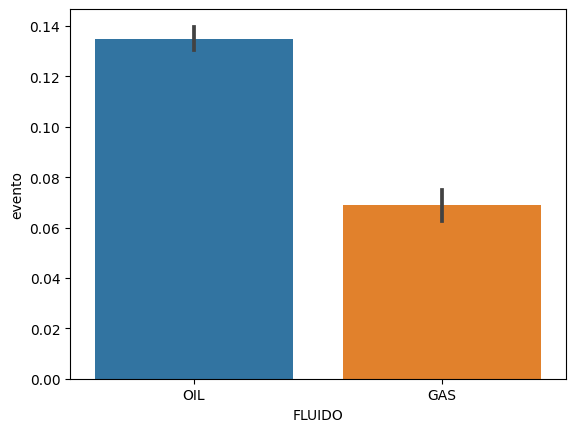

In [16]:
sns.barplot(data=train,x="FLUIDO",y="evento")

[Text(0, 0, 'Campo D'),
 Text(1, 0, 'Campo C'),
 Text(2, 0, 'Campo F'),
 Text(3, 0, 'Campo E'),
 Text(4, 0, 'Campo B'),
 Text(5, 0, 'Campo I'),
 Text(6, 0, 'Campo A'),
 Text(7, 0, 'Campo H'),
 Text(8, 0, 'Campo G')]

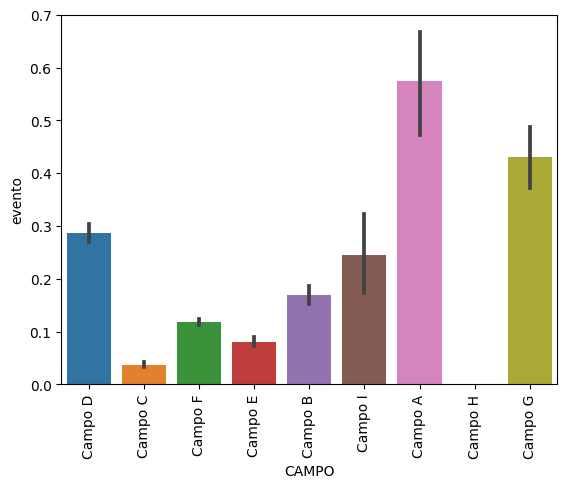

In [20]:
ax= sns.barplot(data=train,x="CAMPO",y="evento")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

Este gráfico representa el % de interferencia según el campo que se está analizando

In [14]:
eventos_padhijo = train[train["evento"]==1]["PAD_HIJO"]
eventos_padre = train[train["evento"]==1]["PADRE"]
eventos_hijo = train[train["evento"]==1]["PAD_HIJO"]


<AxesSubplot:xlabel='PAD_HIJO', ylabel='Count'>

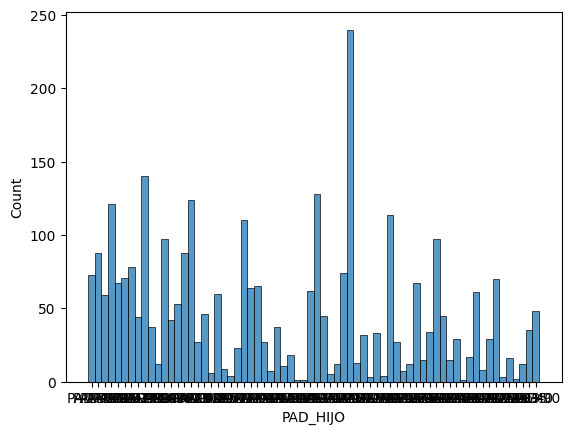

In [15]:
sns.histplot(data = eventos_padhijo)

<AxesSubplot:xlabel='PADRE', ylabel='Count'>

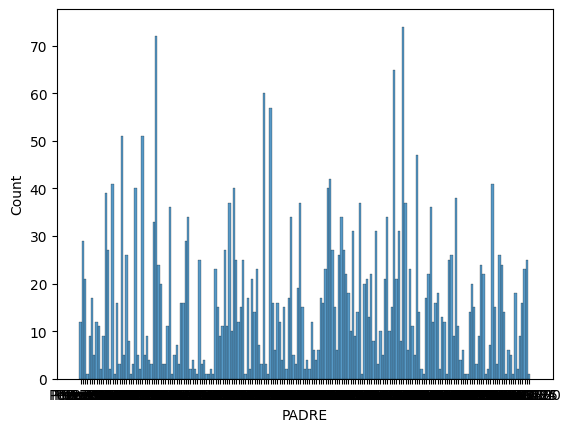

In [16]:
sns.histplot(data = eventos_padre)

<AxesSubplot:xlabel='PAD_HIJO', ylabel='Count'>

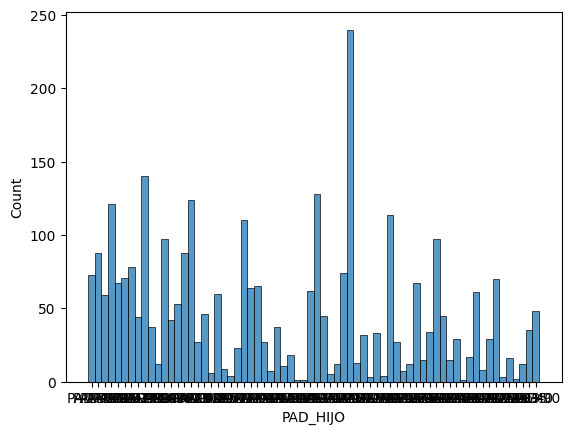

In [17]:
sns.histplot(data = eventos_hijo)